In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
T_i = 300    # Temperature in Kelvin
k = 1.38e-23 # Boltzmann constant in J/K
m = 1e-26    # Mass of a particle in kg
L = 1        # Length of cube side in meters
N = 1        # Number of particles (only 1 particle here)

# Particle initial position and velocity
x_i = np.random.rand()
y_i = np.random.rand()
vx_i = 400   # initial x velocity in m/s
vy_i = 200   # initial y velocity in m/s

# Simulation parameters
Tau = L / min(vx_i, vy_i)  # time for particle to traverse box
tmax = Tau * 20           # total simulation time
tres = Tau / 500           # time step
N_time = round(tmax / tres) # number of time steps

# Initialize arrays to store positions
x = np.zeros((N, N_time))
y = np.zeros((N, N_time))
x[:, 0] = x_i
y[:, 0] = y_i

# Initialize velocities
vx = np.full(N, vx_i)
vy = np.full(N, vy_i)

# To track impulse and force
Jx = np.zeros(N_time) # total impulse over time
collisions = 0        # counter for collisions with a specific wall

for t in range(1, N_time):
    x[:, t] = x[:, t-1] + vx * tres
    y[:, t] = y[:, t-1] + vy * tres

    # Check for collisions and reverse velocity if necessary
    ind = x[:, t] > L
    vx[ind] = -vx[ind]
    if np.any(ind):
        collisions += np.sum(ind)
        Jx[t] = Jx[t-1] + 2 * m * np.abs(vx_i)
    else:
        Jx[t] = Jx[t-1]

    ind = x[:, t] < 0
    vx[ind] = -vx[ind]
    if np.any(ind):
        collisions += np.sum(ind)
        Jx[t] = Jx[t-1] + 2 * m * np.abs(vx_i)
    else:
        Jx[t] = Jx[t-1]

    ind = y[:, t] > L
    vy[ind] = -vy[ind]

    ind = y[:, t] < 0
    vy[ind] = -vy[ind]

# Plot the impulse over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(N_time) * tres, Jx, label='Total Impulse on the Wall')
plt.xlabel('Time (s)')
plt.ylabel('Impulse (Ns)')
plt.title('Total Impulse on the Wall Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the average force
delta_t = tmax
average_force = Jx[-1] / delta_t
print(f'Estimated Average Force on the Wall: {average_force:.3e} N')

# Animation part (optional)
fig = plt.figure(1, figsize=(5, 5))
ax = plt.axes(xlim=(0, L), ylim=(0, L))
particle = ax.plot(x_i, y_i, '.', markersize=15)[0]

# Labels
ax.set_xlabel('x position of particle in box (m)')
ax.set_ylabel('y position of particle in box (m)')
ax.set_title('Particle in a box')

step_anim = 50
xn = x[:, ::step_anim]
yn = y[:, ::step_anim]

def animate(frame):
    particle.set_data(xn[:, frame], yn[:, frame])
    return particle

nframes = round(N_time / step_anim)
anim = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False, interval=1)
anim.save('particle_trajectory_py.gif', writer='pillow', fps=10)


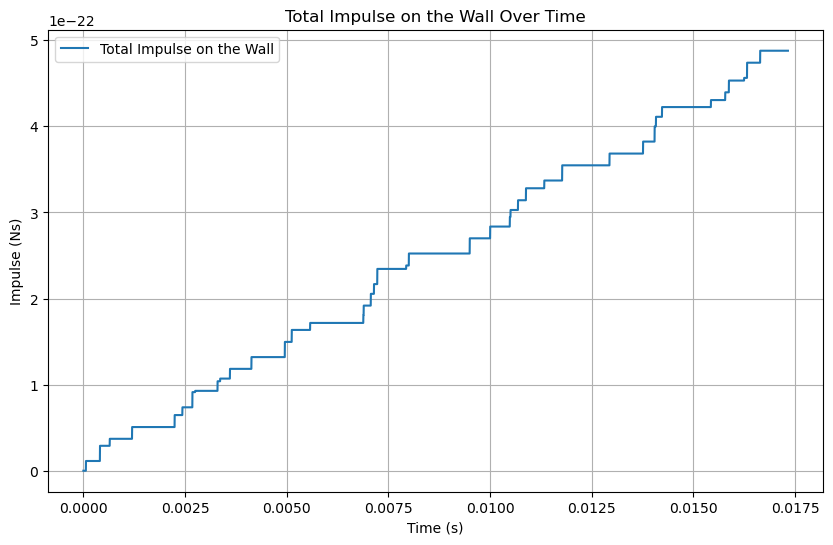

Estimated Average Force on the Wall: 2.816e-20 N


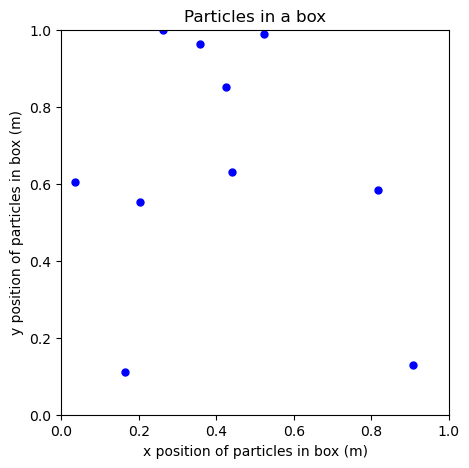

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
T = 300           # Temperature in Kelvin
k = 1.38e-23      # Boltzmann constant in J/K
m = 1e-26         # Mass of a particle in kg
L = 1             # Length of cube side in meters
N = 10           # Number of particles

# Thermal velocity distribution
stddev = np.sqrt(k * T / m)

# Initial positions and velocities
x = np.random.rand(N) * L
y = np.random.rand(N) * L
vx = np.random.normal(0, stddev, N)
vy = np.random.normal(0, stddev, N)

# Simulation parameters
Tau = L / np.max(np.abs(np.concatenate((vx, vy))))  # time for fastest particle to traverse box
tmax = Tau * 20                                     # total simulation time
tres = Tau / 500                                    # time step
N_time = round(tmax / tres)                         # number of time steps

# Initialize arrays to store positions and impulse
x_positions = np.zeros((N, N_time))
y_positions = np.zeros((N, N_time))
x_positions[:, 0] = x
y_positions[:, 0] = y
Jx = np.zeros(N_time)  # total impulse over time

# Simulation loop
for t in range(1, N_time):
    x_positions[:, t] = x_positions[:, t-1] + vx * tres
    y_positions[:, t] = y_positions[:, t-1] + vy * tres

    # Check for collisions with the walls and reverse velocities if necessary
    ind = x_positions[:, t] > L
    vx[ind] = -vx[ind]
    Jx[t] = Jx[t-1] + np.sum(2 * m * np.abs(vx[ind]))

    ind = x_positions[:, t] < 0
    vx[ind] = -vx[ind]
    Jx[t] = Jx[t-1] + np.sum(2 * m * np.abs(vx[ind]))

    ind = y_positions[:, t] > L
    vy[ind] = -vy[ind]

    ind = y_positions[:, t] < 0
    vy[ind] = -vy[ind]

# Plot the impulse over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(N_time) * tres, Jx, label='Total Impulse on the Wall')
plt.xlabel('Time (s)')
plt.ylabel('Impulse (Ns)')
plt.title('Total Impulse on the Wall Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the average force
delta_t = tmax
average_force = Jx[-1] / delta_t
print(f'Estimated Average Force on the Wall: {average_force:.3e} N')

# Animation part (optional)
fig = plt.figure(1, figsize=(5, 5))
ax = plt.axes(xlim=(0, L), ylim=(0, L))
particles, = ax.plot([], [], 'bo', markersize=5)

# Labels
ax.set_xlabel('x position of particles in box (m)')
ax.set_ylabel('y position of particles in box (m)')
ax.set_title('Particles in a box')

step_anim = 50
x_anim = x_positions[:, ::step_anim]
y_anim = y_positions[:, ::step_anim]

def animate(frame):
    particles.set_data(x_anim[:, frame], y_anim[:, frame])
    return particles,

nframes = round(N_time / step_anim)
anim = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False, interval=1)
anim.save('particles_trajectory_py.gif', writer='pillow', fps=10)


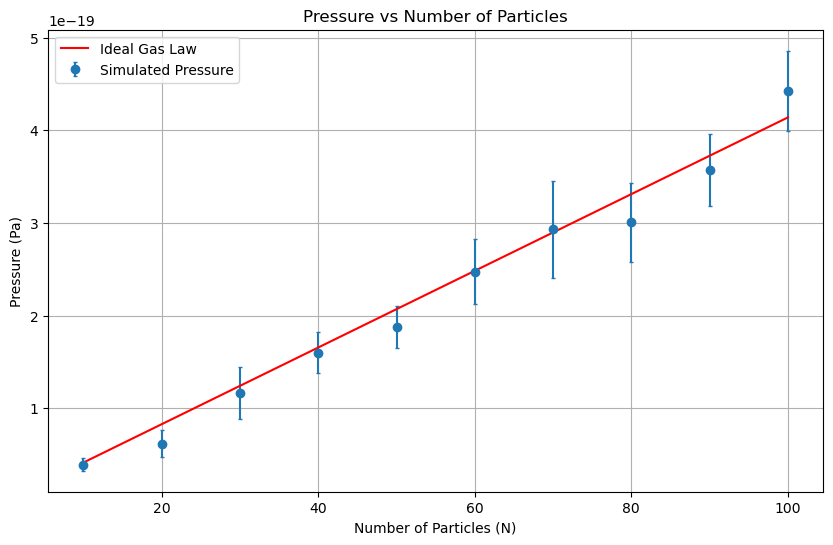

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T = 300           # Temperature in Kelvin
k = 1.38e-23      # Boltzmann constant in J/K
m = 1e-26         # Mass of a particle in kg
L = 1             # Length of cube side in meters
stddev = np.sqrt(k * T / m)  # Standard deviation for velocity distribution

# Simulation parameters
Tau = L / stddev  # Estimated time for particle to traverse the box
tmax = Tau * 20   # Total simulation time
tres = Tau / 500  # Time step
N_time = round(tmax / tres)  # Number of time steps

def run_simulation(N):
    # Initial positions and velocities
    x = np.random.rand(N) * L
    y = np.random.rand(N) * L
    vx = np.random.normal(0, stddev, N)
    vy = np.random.normal(0, stddev, N)
    
    # Initialize impulse array
    Jx = np.zeros(N_time)  # Total impulse over time
    
    for t in range(1, N_time):
        x += vx * tres
        y += vy * tres
        
        # Check for collisions with the walls and reverse velocities if necessary
        ind = x > L
        vx[ind] = -vx[ind]
        Jx[t] = Jx[t-1] + np.sum(2 * m * np.abs(vx[ind]))
        
        ind = x < 0
        vx[ind] = -vx[ind]
        Jx[t] = Jx[t-1] + np.sum(2 * m * np.abs(vx[ind]))
        
        ind = y > L
        vy[ind] = -vy[ind]
        
        ind = y < 0
        vy[ind] = -vy[ind]
    
    # Calculate the average force and pressure
    average_force = Jx[-1] / tmax
    pressure = average_force / L
    return pressure, Jx

# Simulation for different number of particles to plot P against N
N_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
pressures = []
errors = []

for N in N_values:
    pressures_N = []
    for _ in range(5):  # Run multiple simulations to get an average pressure and error
        pressure, Jx = run_simulation(N)
        pressures_N.append(pressure)
    pressures.append(np.mean(pressures_N))
    errors.append(np.std(pressures_N))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(N_values, pressures, yerr=errors, fmt='o', label='Simulated Pressure', capsize = 1.5)
plt.plot(N_values, N_values * k * T / (L * L), 'r-', label='Ideal Gas Law')
plt.xlabel('Number of Particles (N)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs Number of Particles')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lennard-Jones parameters
epsilon = 1.0  # Depth of the potential well
sigma = 1.0    # Finite distance at which the inter-particle potential is zero

# Define the Lennard-Jones potential
def lennard_jones_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Define the force derived from the Lennard-Jones potential
def lennard_jones_force(r, epsilon, sigma):
    return 24 * epsilon * (2 * (sigma / r)**12 - (sigma / r)**6) / r

# Calculate the distance at the minimum of the Lennard-Jones potential
r_min = sigma * 2**(1/6)
print("Equilibrium distance r_min:", r_min)

# Plot the Lennard-Jones potential
r = np.linspace(0.8, 3, 500)
V = lennard_jones_potential(r, epsilon, sigma)

plt.plot(r, V)
plt.axvline(x=r_min, color='r', linestyle='--', label=f'r_min = {r_min:.2f}')
plt.title('Lennard-Jones Potential')
plt.xlabel('Distance r')
plt.ylabel('Potential V(r)')
plt.legend()
plt.show()



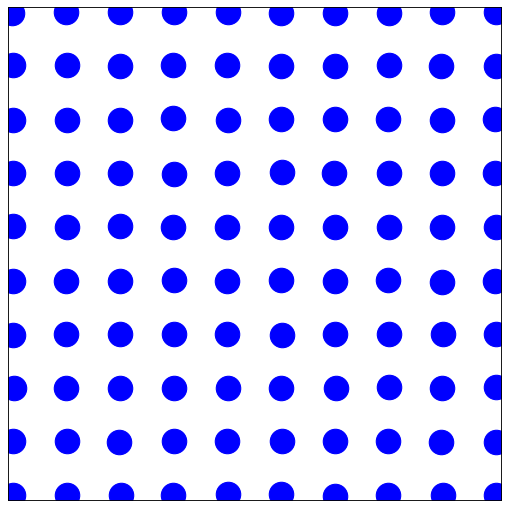

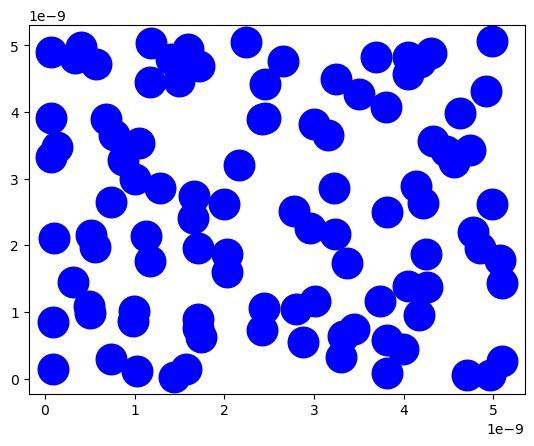

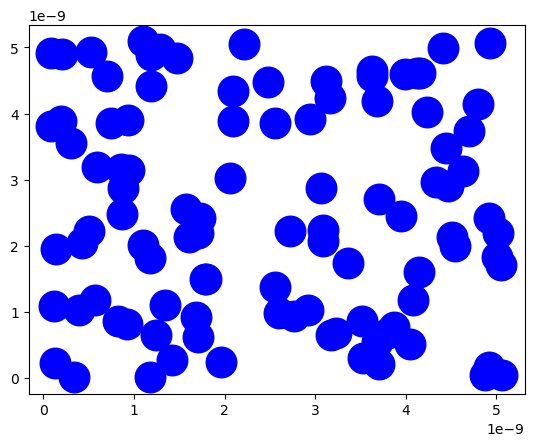

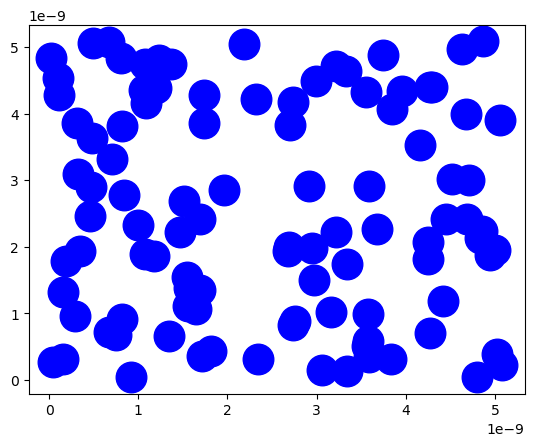

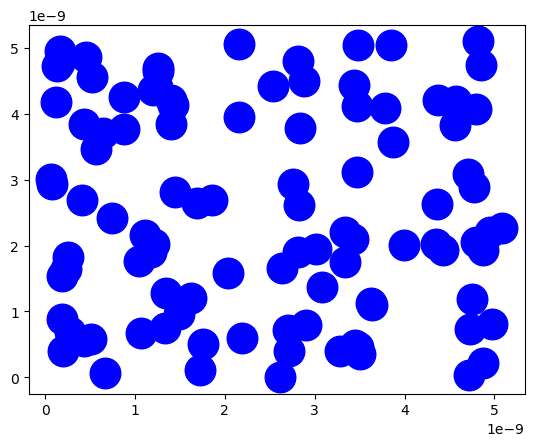

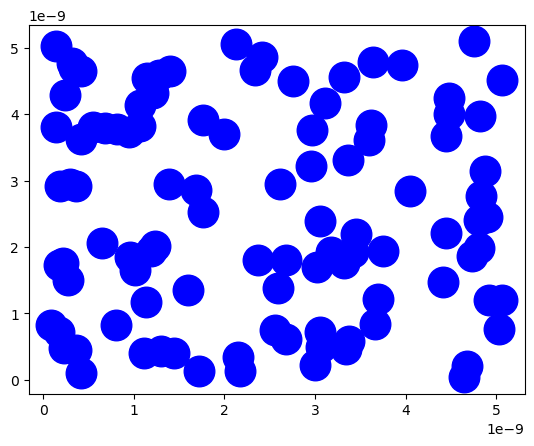

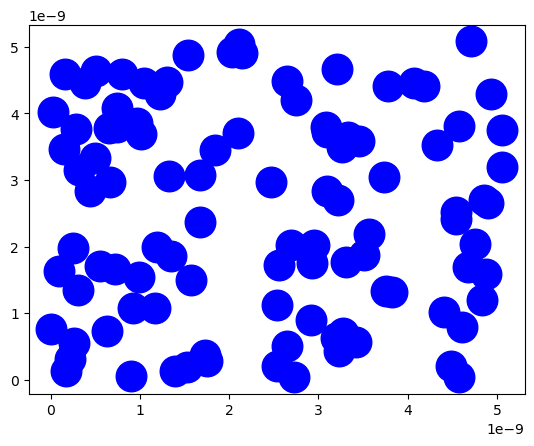

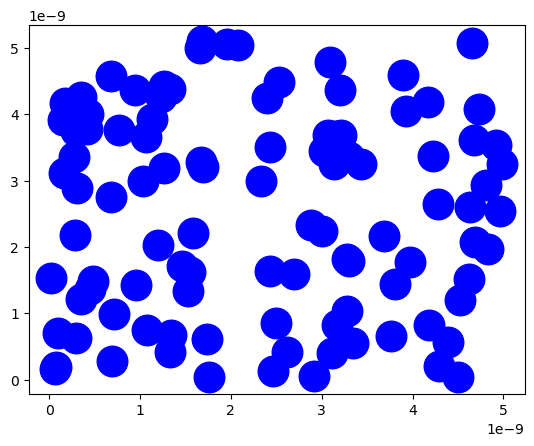

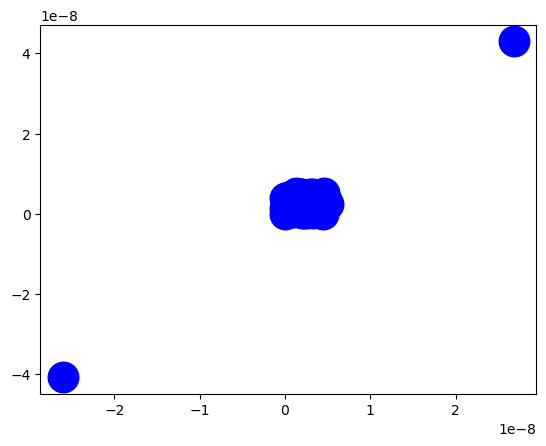

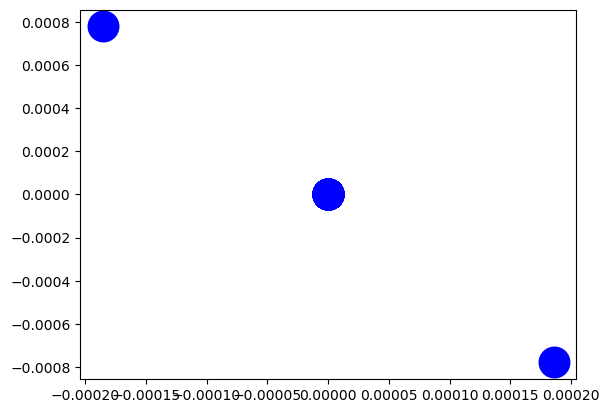

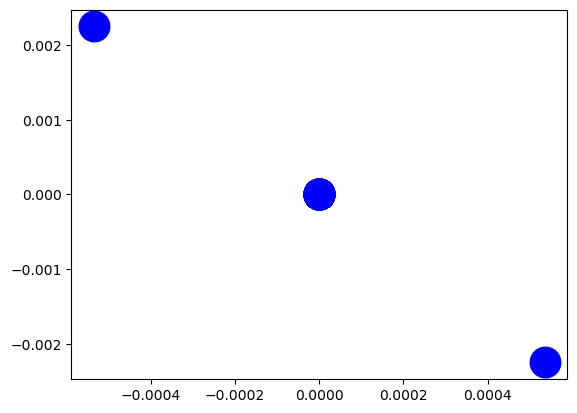

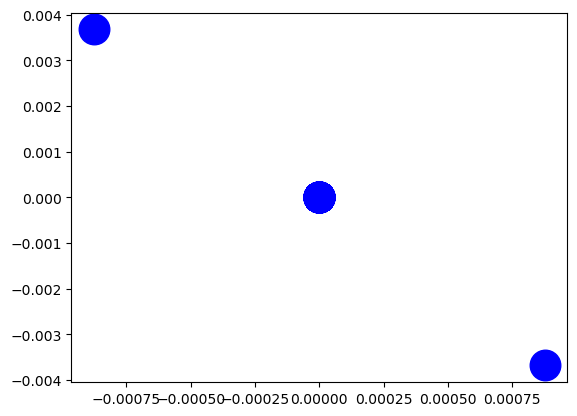

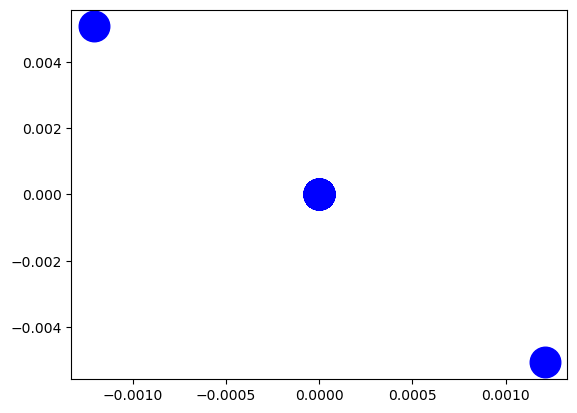

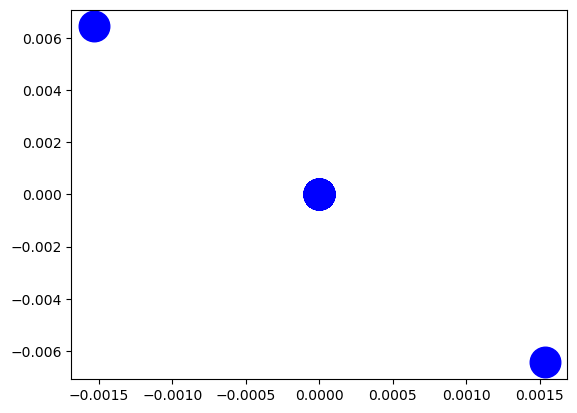

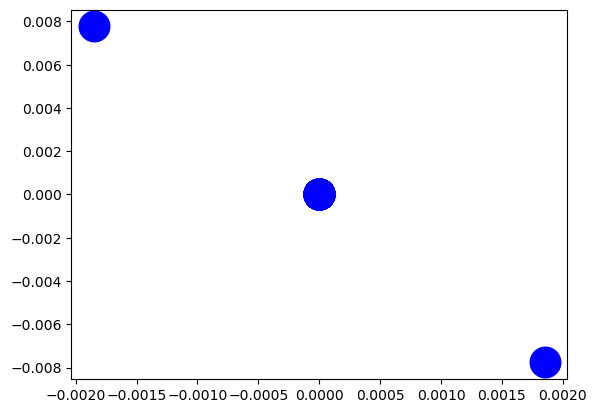

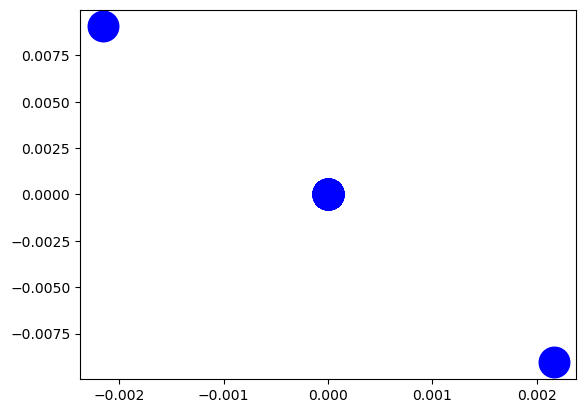

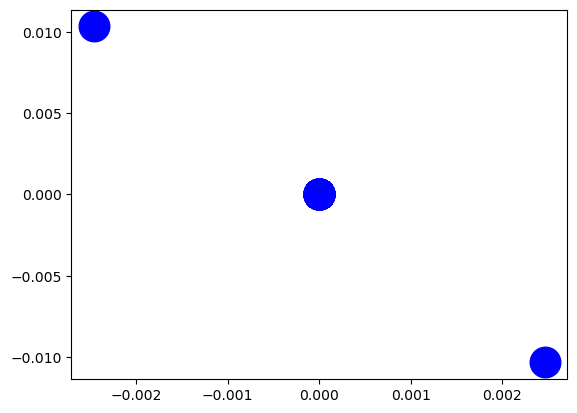

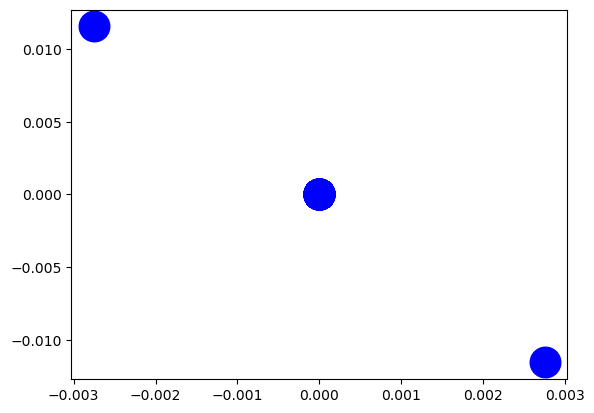

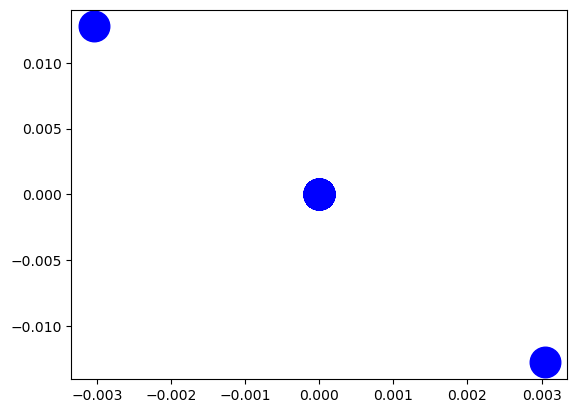

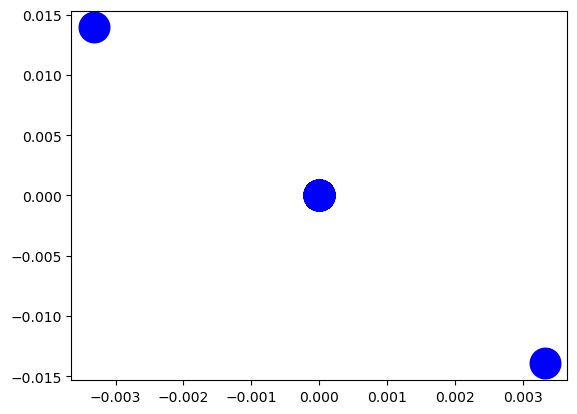

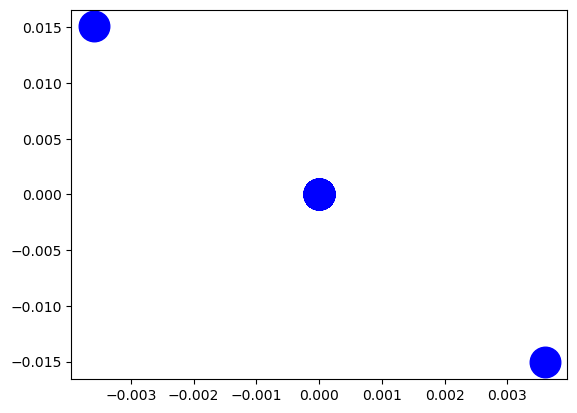

KeyboardInterrupt: 

In [38]:

# Basic Simulation parameters
T_i = 300    # Temperature in Kelvin
k = 1.38e-23 # Boltzmann constant in J/K
m = 1e-26    # Mass of a particle in kg
L = 1        # Length of cube side in meters
N = 100        # Number of particles (only 1 particle here)

#Extra Parameters
eps = 1.95e-21
sig = 0.34e-9
A = 4 * eps * sig**12
B = 4 * eps * sig**6
L= 15 * sig  #length of side in meters
lmbda = 0.9995
dis = np.sqrt((k * T_i )/m) 

def r(xdis,ydis):
    return np.sqrt(xdis**2 + ydis**2)
def r2(xdis,ydis):
    return xdis**2 + ydis**2
def Fx(xdis,ydis):
    #return (-24*eps)*((2*xdis*sig**12)*(xdis**2 + ydis**2)**(-7) - (xdis*sig**6)*((xdis)**2+(ydis)**2)**(-4))
    return (-12 * A * xdis ) * r2(xdis,ydis) ** (-7) + (6* B *xdis ) * r2(xdis,ydis) ** (-4)
def Fy(xdis,ydis):
    #return (-24*eps)*((2*ydis*sig**12)*(xdis**2 + ydis**2)**(-7) - (ydis*sig**6)*((xdis)**2+(ydis)**2)**(-4))
    return (-12 * A * ydis) * r2(xdis,ydis) ** (-7)  + (6* B * ydis) * r2(xdis,ydis) ** (-4)


Tau = L / dis # Time for particle to traverse box. 
tmax = Tau * 10 #simulation time i.e how many times the particles collide
dt = 0.01 * sig * np.sqrt(m/eps) # time step i.e.
#dt = Tau / 3000
N_time = round(tmax/dt) # number of time steps in the simulation used to define length of loop
TC = m/(2* N * k)
trials = 1
#Temperature parameters
T = np.zeros([trials, int(np.ceil(tmax/dt))])
a = np.arange(0,tmax,dt)
Pres = np.zeros([trials, N_time])
# Time parameters

for tn in np.arange(trials):

    gridedge = np.linspace(0.01*L,0.99*L, int(np.sqrt(N)))
    icord, jcord = np.meshgrid(gridedge, gridedge)
    pos = np.column_stack((icord.reshape(-1),jcord.reshape(-1)))


    vel = dis * (np.random.standard_normal([N,2]))
    acc = np.zeros([N,2])
    J = np.zeros(N_time)

    fig = plt.figure(figsize=(8,8), dpi = 80)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for t in np.arange(N_time):
        vel = vel * lmbda  
        pos += vel * dt + 0.5 * acc * dt**2
        vel += 0.5 * acc * dt 

        acc.fill(0)

        for i in np.arange(N):


            for j in np.arange(i-1):

                x = pos[i,0] - pos[j,0]
                y = pos[i,1] - pos[j,1]

                
                acc[i,0] += mi * -Fx(x,y)
                acc[i,1] += mi * -Fy(x,y)
                acc[j,0] += mi * Fx(x,y)
                acc[j,1] += mi * Fy(x,y)
            
        vel += 0.5 * acc * dt 

        vel = np.where(pos >= L, -vel, vel) 
        vel = np.where(pos <= 0, -vel, vel) 

        J[t] = 2 * m * np.sum(vel[pos >= L]) 
        T[tn,t] =  TC * np.sum(np.sum(vel ** 2, axis = 0))
        if ( t % 50 == 0):
            plt.cla()
            plt.plot(pos[:,0],pos[:,1],'bo', markersize = 22)
            ax.set(xlim=(0, L), ylim=(0, L))
            ax.set_aspect('equal')	
            plt.pause(0.0000000000000001)
        
    plt.show()

    Jtc = np.cumsum(np.abs(J), axis = 0)

    for t in np.arange(N_time):
        Pres[tn,t] = Jtc[t] / (2* t * dt * L)

    
   
        
for tn in np.arange(trials): 
    plt.plot(a.reshape(-1,1),T[tn,:], label = "Trial" + str(tn+1))

plt.plot(a.reshape(-1,1),np.mean(T, axis = 0), label = "Average")
plt.axis([0, tmax, 0, 2 * int(round(1.1*np.max(T)))])
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Temperature (K)")
plt.show()

for tn in np.arange(trials):
    plt.plot(np.linspace(0,tmax,N_time),Pres[tn,:], label = "Trial" + str(tn+1))
plt.plot(np.linspace(0,tmax,N_time), np.mean(Pres, axis = 0), label = "Average")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure over time")
plt.show()



C:\Users\neha\AppData\Local\Temp\ipykernel_22260\1818306828.py:113: RuntimeWarning: invalid value encountered in double_scalars
  Pres[tn, t] = Jtc[t] / (2 * t * dt * L)


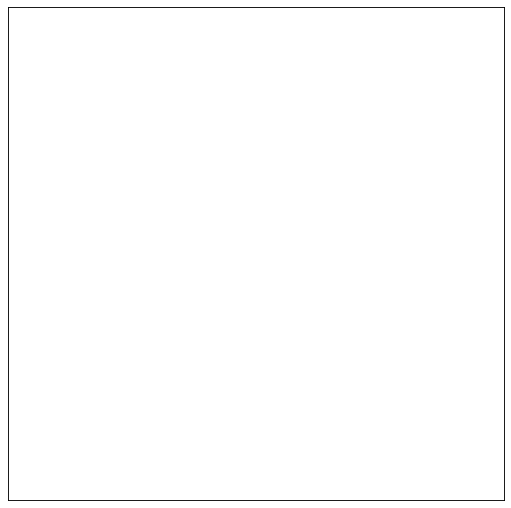

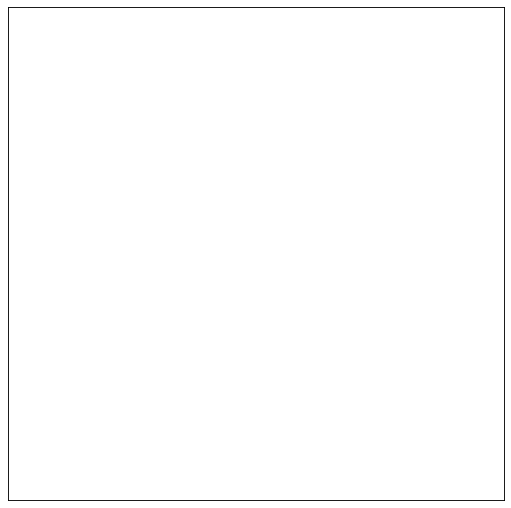

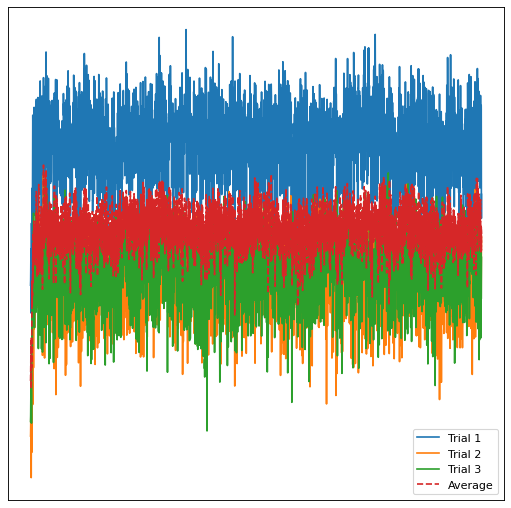

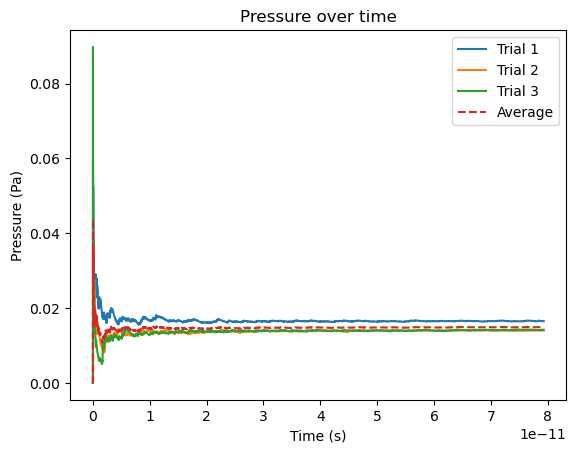

In [44]:
# Basic Simulation parameters
T_i = 300    # Temperature in Kelvin
k = 1.38e-23 # Boltzmann constant in J/K
m = 1e-26    # Mass of a particle in kg
N = 100      # Number of particles

# Lennard-Jones potential parameters
eps = 1.95e-21
sig = 0.34e-9
L = 15 * sig  # Length of side in meters
lmbda = 0.9995
dis = np.sqrt((k * T_i) / m) 

def r(xdis, ydis):
    return np.sqrt(xdis**2 + ydis**2)

def r2(xdis, ydis):
    return xdis**2 + ydis**2

def Fx(xdis, ydis):
    r2_val = r2(xdis, ydis)
    r6 = (sig**2 / r2_val)**3
    r12 = r6**2
    return 24 * eps * (2 * r12 - r6) * xdis / r2_val

def Fy(xdis, ydis):
    r2_val = r2(xdis, ydis)
    r6 = (sig**2 / r2_val)**3
    r12 = r6**2
    return 24 * eps * (2 * r12 - r6) * ydis / r2_val

Tau = L / dis 
tmax = Tau * 10 
dt = 0.01 * sig * np.sqrt(m/eps) 
N_time = round(tmax/dt) 
TC = m / (2 * N * k)

T = np.zeros([3, int(np.ceil(tmax/dt))])
a = np.arange(0, tmax, dt)
Pres = np.zeros([3, N_time])

# Number of trials, currently set to 3 
# 5 = 25 mins
# 3 = 12 mins
# 1 = 5 mins
trials = 3

for tn in np.arange(trials):
    gridedge = np.linspace(0.01*L, 0.99*L, int(np.sqrt(N)))
    icord, jcord = np.meshgrid(gridedge, gridedge)
    pos = np.column_stack((icord.reshape(-1), jcord.reshape(-1)))

    # Particle's velocity
    vel = dis * (np.random.standard_normal([N, 2]))
    acc = np.zeros([N, 2])
    J = np.zeros(N_time)

    fig = plt.figure(figsize=(8, 8), dpi=80)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for t in np.arange(N_time):
        # FInd position and velocity of particle
        pos += vel * dt + 0.5 * acc * dt**2

        vel += 0.5 * acc * dt

        
        acc.fill(0)
        for i in np.arange(N):
            for j in np.arange(i):
                x = pos[i, 0] - pos[j, 0]
                y = pos[i, 1] - pos[j, 1]
                if r(x, y) < 2.5 * sig:  # this was done to reduce time 
                    acc[i, 0] += Fx(x, y) / m
                    acc[i, 1] += Fy(x, y) / m
                    acc[j, 0] -= Fx(x, y) / m
                    acc[j, 1] -= Fy(x, y) / m

        # Compute final velocities using the new accelerations
        vel += 0.5 * acc * dt

        # Boundary collisions and reverse direction if necessary
        vel = np.where(pos >= L, -vel, vel)
        vel = np.where(pos <= 0, -vel, vel)

        # Calculate impulse from particles hitting the right wall
        J[t] = 2 * m * np.sum(vel[pos[:, 0] >= L, 0])

        # Calculate temperature
        T[tn, t] = TC * np.sum(np.sum(vel ** 2, axis=1))
        

    Jtc = np.cumsum(np.abs(J), axis=0)

    for t in np.arange(N_time):
        Pres[tn, t] = Jtc[t] / (2 * t * dt * L)

# Temperature over time
for tn in np.arange(trials):
    plt.plot(a, T[tn, :], label=f"Trial {tn+1}")
plt.plot(a, np.mean(T, axis=0), label="Average", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

# Pressure over time
for tn in np.arange(trials):
    plt.plot(np.linspace(0, tmax, N_time), Pres[tn, :], label=f"Trial {tn+1}")
plt.plot(np.linspace(0, tmax, N_time), np.mean(Pres, axis=0), label="Average", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure over time")
plt.legend()
plt.show()




C:\Users\neha\AppData\Local\Temp\ipykernel_22260\1316924074.py:109: RuntimeWarning: invalid value encountered in double_scalars
  Pres[tn,t] = Jtc[t] / (2* t * dt * L)


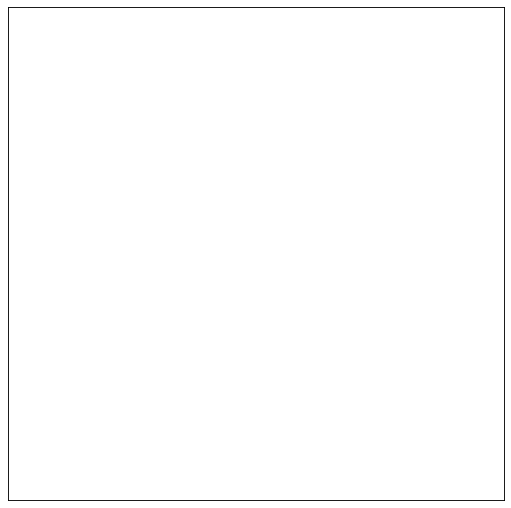

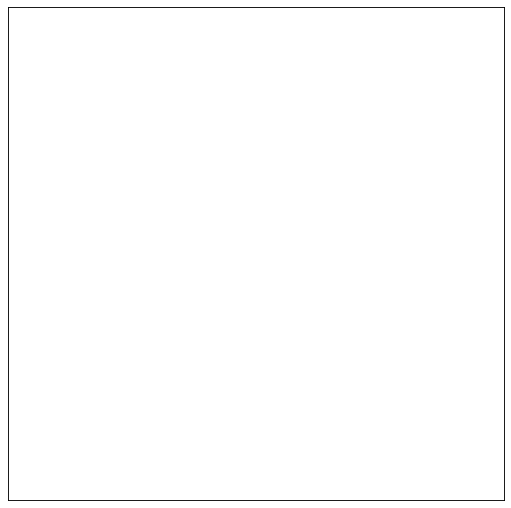

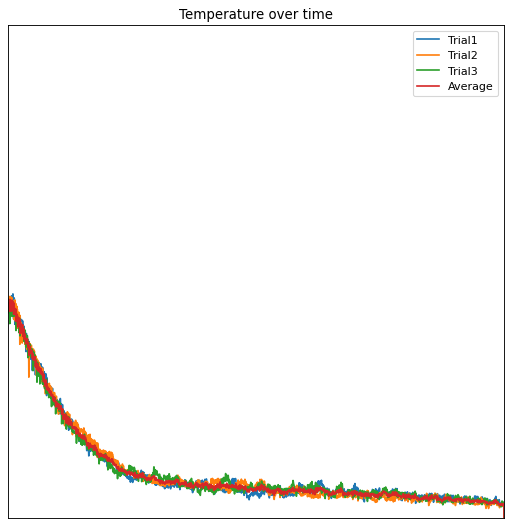

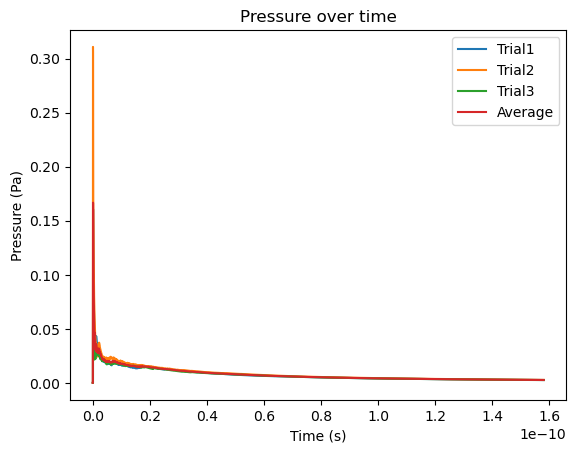

In [54]:


T_i = 500; # initial Temperature in Kelvin
k= 1.38e-23; #Boltzmann constant
m= 6.63e-26;    #Mass of a particle in kg
N = 64 
mi = 1/m


eps = 1.95e-21
sig = 0.34e-9
A = 4 * eps * sig**12
B = 4 * eps * sig**6
L= 15 * sig  
lmbda = 0.9995
dis = np.sqrt((k * T_i )/m) 

def r(xdis,ydis):
    return np.sqrt(xdis**2 + ydis**2)
def r2(xdis,ydis):
    return xdis**2 + ydis**2
def Fx(xdis,ydis):
    return (-12 * A * xdis ) * r2(xdis,ydis) ** (-7) + (6* B *xdis ) * r2(xdis,ydis) ** (-4)
def Fy(xdis,ydis):
    
    return (-12 * A * ydis) * r2(xdis,ydis) ** (-7)  + (6* B * ydis) * r2(xdis,ydis) ** (-4)


Tau = L / dis # Time for particle to traverse box. 
tmax = Tau * 10 #simulation time i.e how many times the particles collide
dt = 0.01 * sig * np.sqrt(m/eps) # time step i.e.
#dt = Tau / 3000
N_time = round(tmax/dt) # number of time steps in the simulation used to define length of loop
TC = m/(2* N * k)
trials = 3
#Temperature parameters
T = np.zeros([trials, int(np.ceil(tmax/dt))])
a = np.arange(0,tmax,dt)
Pres = np.zeros([trials, N_time])
# Time parameters

for tn in np.arange(trials):

    #Placing particles in a grid
    gridedge = np.linspace(0.01*L,0.99*L, int(np.sqrt(N)))
    icord, jcord = np.meshgrid(gridedge, gridedge)
    pos = np.column_stack((icord.reshape(-1),jcord.reshape(-1)))


    vel = dis * (np.random.standard_normal([N,2]))
    acc = np.zeros([N,2])
    J = np.zeros(N_time)

    fig = plt.figure(figsize=(8,8), dpi = 80)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for t in np.arange(N_time):
        vel = vel * lmbda  
        pos += vel * dt + 0.5 * acc * dt**2
        vel += 0.5 * acc * dt 

        acc.fill(0)

        for i in np.arange(N):


            for j in np.arange(i-1):

                x = pos[i,0] - pos[j,0]
                y = pos[i,1] - pos[j,1]

                
                acc[i,0] += mi * -Fx(x,y)
                acc[i,1] += mi * -Fy(x,y)
                acc[j,0] += mi * Fx(x,y)
                acc[j,1] += mi * Fy(x,y)
            
        vel += 0.5 * acc * dt 

        vel = np.where(pos >= L, -vel, vel) 
        vel = np.where(pos <= 0, -vel, vel)

        J[t] = 2 * m * np.sum(vel[pos >= L]) 
        T[tn,t] =  TC * np.sum(np.sum(vel ** 2, axis = 0))

    Jtc = np.cumsum(np.abs(J), axis = 0)

    for t in np.arange(N_time):
        Pres[tn,t] = Jtc[t] / (2* t * dt * L)

    
        
for tn in np.arange(trials): 
    plt.plot(a.reshape(-1,1),T[tn,:], label = "Trial" + str(tn+1))

plt.plot(a.reshape(-1,1),np.mean(T, axis = 0), label = "Average")
plt.axis([0, tmax, 0, 2 * int(round(1.1*np.max(T)))])
plt.xlabel("Time(s)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.title("Temperature over time")
plt.show()

for tn in np.arange(trials):
    plt.plot(np.linspace(0,tmax,N_time),Pres[tn,:], label = "Trial" + str(tn+1))
plt.plot(np.linspace(0,tmax,N_time), np.mean(Pres, axis = 0), label = "Average")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure over time")
plt.show()
